# Module 02: A Box Model Carbon Assignment

**Name:** Michael Chiwere

### 1. Introduction

In the accompanying notebook [mod02-CarbonModel1.ipynb](./mod02-CarbonModel1.ipynb) and in class we developed a relatively simple model of global carbon balance that assumed that tracked carbon in the atmosphere and biosphere. The system of equations we developed to describe this system are shown below,

$$
\begin{align*}
\frac{dM_1}{dt} &= F_{21} - F_{12}\\
&= k_{21}M_2 - k_{12}M_1
\end{align*}
$$

and,

$$
\begin{align*}
\frac{dM_2}{dt} &= F_{12} - F_{21}\\
&= k_{12}M_1 - k_{21}M_2
\end{align*}
$$

where $M_1$ is the mass of carbon in the atmosphere (GtC), $M_2$ is the mass of carbon in the biosphere (GtC), $F_{12}$ is the flux of carbon from the atmosphere to the biosphere due to photosynthesis (GtC/yr), and $F_{21}$ is the flux of carbon from the biosphere to the atmosphere due to decay and respiration (GtC/yr).

In that notebook we develop a numerical model to describe that system, run it for given initial conditions and with no external inputs of carbon (we call this an "unforced" scenario) and compare it to the analytical solution. We observed that as the time step increased, we departed further from the analytical solution. 

In this assignment you will take your model one step more realistic by ensuring that the photosynthetic flux depends on both the amount of carbon in the atmosphere and in the biosphere. Then you will examine the impact of anthropogenic emissions from 1751-2008 on the biosphere and atmosphere, and how alternative future scenarios of emissions mitigation affect your system. 

The code cell below contains a couple of new commands and some file names that you will need in this assignment. You will need all of these commands, _but not necessarily

In [2]:
import numpy as np
import matplotlib.pyplot as plt

historical_emissions_file = 'AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)
# Read this documentation to understand what this command does: 
#    https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html
year = data[:,0]
cflux = data[:,1]

cflux_t = np.interp(t, year, cflux)
# Read this documentation to understand what this command does: 
#    https://numpy.org/doc/stable/reference/generated/numpy.interp.html

np.diff(M1)
# Read this documentation to understand what this command does: 
#    https://numpy.org/doc/stable/reference/generated/numpy.diff.html

## 2. Assignment Tasks

For all plots, label all axes and provide units.

__Problem A: Modify and rerun the model__

1. Modify the model so that the photosynthesis flux includes the mass of carbon in the land (i.e., $M_2$). Use the following parameters:

  * $M_1^0$ = 1100.0 
  * $M_2^0$ = 300.0 
  * $k_{12}$ = 0.0003 
  * $k_{21}$ = 0.1  

2. Repeat the "unforced" (i.e., no anthropogenic emissions) simulation above, but run the model for `t = 100` years with a daily time step (i.e., `dt = 1/365`)
3. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation

__Problem B: Examine impacts of human emissions__

1. Load the anthropogenic emissions data for 1751-2008 (see numpy `np.loadtxt()` command usage [here](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)). Note that the data is in a comma separated variable file (named `AnthropogenicEmissions.1751_2008.csv`) with one header row.
2. Plot the anthropogenic emissions data  
3. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __A(3)__ above, simulate the response of the carbon system to the anthropogenic emissions from 1751 to 2008 by adding an appropriate source term in the system of equations. Create the following plots:

  * Mass of C in the atmosphere versus time 
  * Mass of C in the land versus time 
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 
    
4. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation in 2008.

__Problem C: Examine the effects of mitigation__

1. Load the alternative emission scenarios contained in the file `.csv`, which represent three pathways to net zero emissions: (a) net zero emissions by the year 2030 (column 2), (c) net zero emissions by 2050 (column 3), and zero emissions growth (i.e., constant emissions) starting in 2008 (column 4).
2. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __B(4)__ above, run the model three times, one for each scenario. Create the following plots: 

  * Mass of C in the atmosphere versus time (all three scenarios on one plot)
  * Mass of C in the land versus time (all three scenarios on one plot)
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 


In [ ]:
future_emissions_file = 'EmissionsMitigationScenarios.csv'

data = np.loadtxt()
year = data[:,0]
cflux_nz2030 = data[:,1]
cflux_nz2050 = data[:,2]
cflux_zeg = data[:,3]

# Solutions

### Problem A: Modifying and reruning the model
The model is modified so that the rate of photosynthesis depends on both the atmospheric carbon and amount of biomass
i.e.,
$$
F_{12} = k_{12}M_1M_2.
$$
The rate of change of carbon  in the two reserviors is now described using the following coupled system:
\begin{align}
\dfrac{\mathrm{d}M_1}{\mathrm{d}t} &= k_{21}M_2 - k_{12}M_1M_2\\[3pt]
\dfrac{\mathrm{d}M_2}{\mathrm{d}t} &= k_{12}M_1M_2 - k_{21}M_2.
\end{align}

We solve the sytem using the Forward Euler,
$$\mathbf{u}^{n+1} = \mathbf{u}^n +\Delta t \mathbf{f}^n$$
as follows.

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# declaring initial values
M1i = 1100.0; M2i = 300.0; k12 = 0.0003; k21 = 0.1;

# computing nuber of time steps
ti = 0;            # initial time
tf = 100.0;         # final time
dt = 1/365;         # number of time steps
t = np.arange(ti,tf+dt,dt);
Nt = t.size;

# containers for the masses of carbon in the system
M1 = np.zeros(Nt);
M2 = np.zeros(Nt);

# storing the initial values
M1[0] = M1i;
M2[0] = M2i;

# solve the system numerically using forward Euler

for n in range(Nt-1):
    fn1 = k21*M2[n] - k12*M1[n]*M2[n];
    fn2 = k12*M1[n]*M2[n] - k21*M2[n];
    M1[n+1] = M1[n] + dt*fn1;
    M2[n+1] = M2[n] + dt*fn2;

# Printing the final M1 and M2 at the end of simulation
print(f"Final M1 at the end of simulation is {M1[Nt-1]:.24f}.\n")
print(f"Final M2 at the end of simulation is {M2[Nt-1]:.24f}.\n")

Final M1 at the end of simulation is 333.333333333365771977696568.

Final M2 at the end of simulation is 1066.666666666579203592846170.



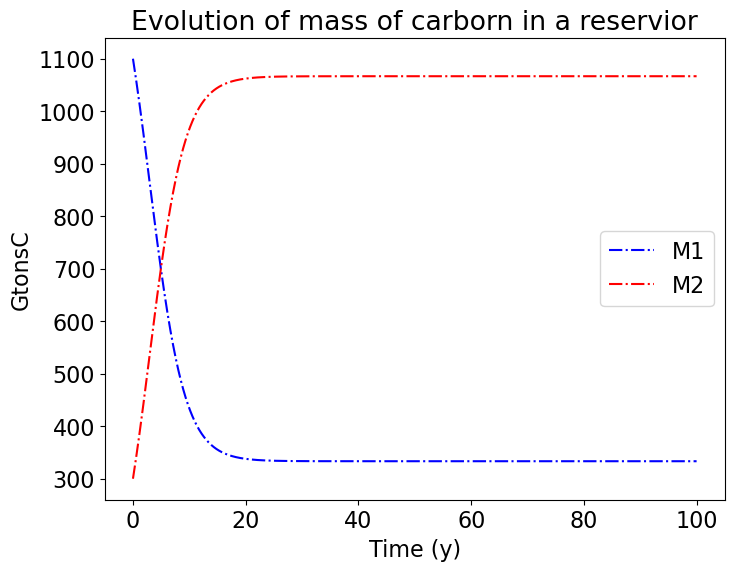

In [92]:
# plotting the solution
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
plt.title('Evolution of mass of carborn in a reservior')
plt.plot(t,M1,'b-.', label='M1')
plt.plot(t,M2,'r-.', label='M2')
plt.xlabel('Time (y)')
plt.ylabel('GtonsC')
plt.legend()
plt.show()

__Problem B: Examine impacts of human emissions__


1. Loading the anthropogenic emissions data for 1751-2008 

In [93]:
# Loading data to the work space and creating storing time separately from carbon flux
data = np.loadtxt("AnthropogenicEmissions.1751_2008.csv", delimiter = ",", skiprows = 1);
year = data[:,0];
cflux = data[:,1];

2. Plotting the anthropogenic emissions data

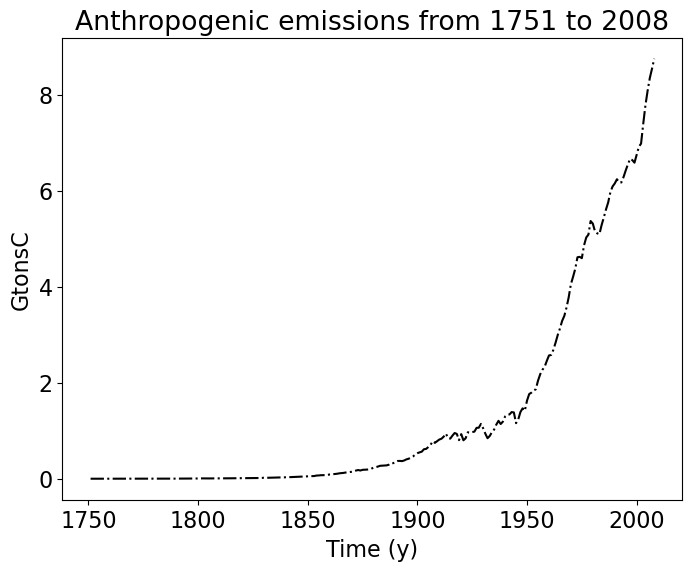

In [94]:
# plotting the anthropogenic emissions data
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
plt.title('Anthropogenic emissions from 1751 to 2008')
plt.plot(year,cflux,'k-.')
plt.xlabel('Time (y)')
plt.ylabel('GtonsC')
plt.show()

The figure shows a steep increase in anthropogenic emissions begining the dawn of the 20th century likely pushed by the industrial
revolution.

3. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __A(3)__ above, we simulate the response of the carbon system to the anthropogenic emissions from 1751 to 2008 by adding an appropriate source term in the system of equations. Thereafter, we create the following plots:

  * Mass of C in the atmosphere versus time 
  * Mass of C in the land versus time 
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 
  
  
To simulate the the response of the anthropogenic emissions on the carbon system we add the amount of carbon emmitted __cflux__ in as a forcing term in the system of equations as follows:
\begin{align}
\dfrac{\mathrm{d}M_1}{\mathrm{d}t} &= k_{21}M_2 - k_{12}M_1M_2 + cflux\\[3pt]
\dfrac{\mathrm{d}M_2}{\mathrm{d}t} &= k_{12}M_1M_2 - k_{21}M_2.
\end{align}

We again use the forward Euler to simulate the result, and because the anthropogenic emissions are reported we use year as a time step.

In [95]:
# initial values
M10 = M1[Nt-1];
M20 = M2[Nt-1];
k12 = 0.0003;
k21 = 0.1
dt = 1;
Nx = year.size

#  countainers
MA1 = np.zeros(Nx);
MA2 = np.zeros(Nx);

# simulating the carbon system
## We do year 1750 separately to avoid if statement
fn1 = k21*M20 - k12*M10*M20 + cflux[0];
fn2 = k12*M10*M20 - k21*M20;
MA1[0] = M10 + dt * fn1;
MA2[0] = M20 + dt * fn2;
for n in range(Nx-1):
    fn1 = k21*M2[n] - k12*M1[n]*M2[n] + cflux[n+1];
    fn2 = k12*M1[n]*M2[n] - k21*M2[n];
    MA1[n+1] = M1[n] + dt*fn1;
    MA2[n+1] = M2[n] + dt*fn2;

 ___Plotting Mass of C in the atmosphere versus time___

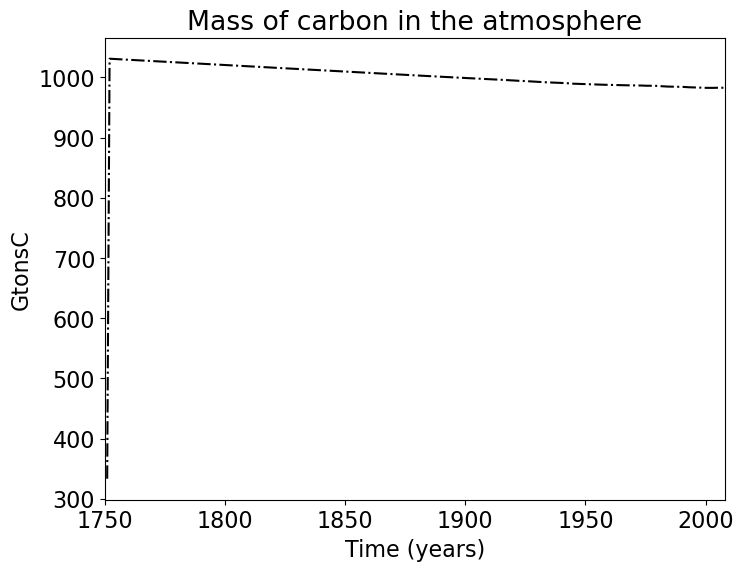

In [96]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
plt.title('Mass of carbon in the atmosphere')
plt.plot(year,MA1,'k-.')
plt.xlabel('Time (years)')
plt.ylabel('GtonsC')
plt.xlim([1750,2008])
plt.show()

___Plotting Mass of carbon in biosphere___

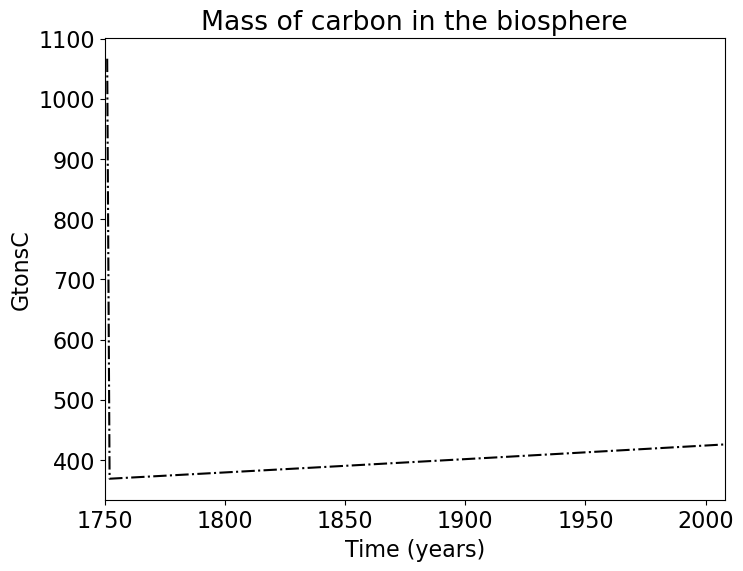

In [97]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
plt.title('Mass of carbon in the biosphere')
plt.plot(year,MA2,'k-.')
plt.xlabel('Time (years)')
plt.ylabel('GtonsC')
plt.xlim([1750,2008])
plt.show()

___Plotting the change in mass of carbon in the atmosphere___

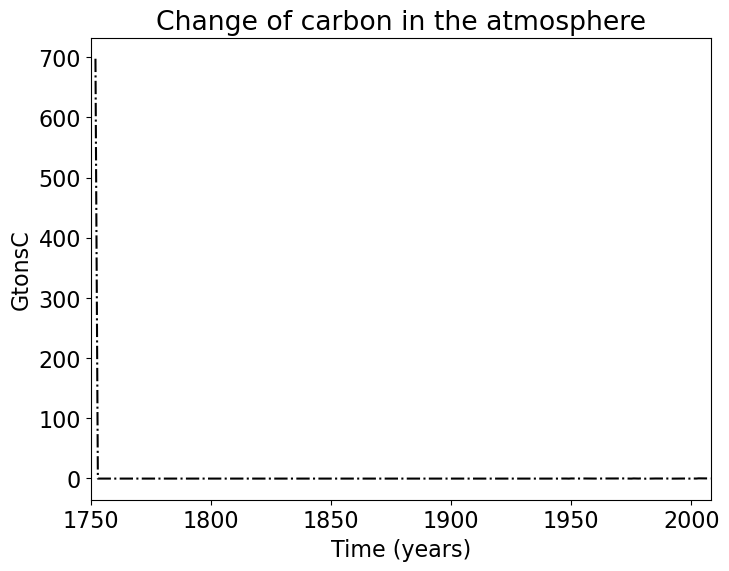

In [98]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
plt.title('Change of carbon in the atmosphere')
plt.plot(year[1:],np.diff(MA1),'k-.')
plt.xlabel('Time (years)')
plt.ylabel('GtonsC')
plt.xlim([1750,2008])
plt.show()

___Plotting change in mass of carbon in the biosphere___

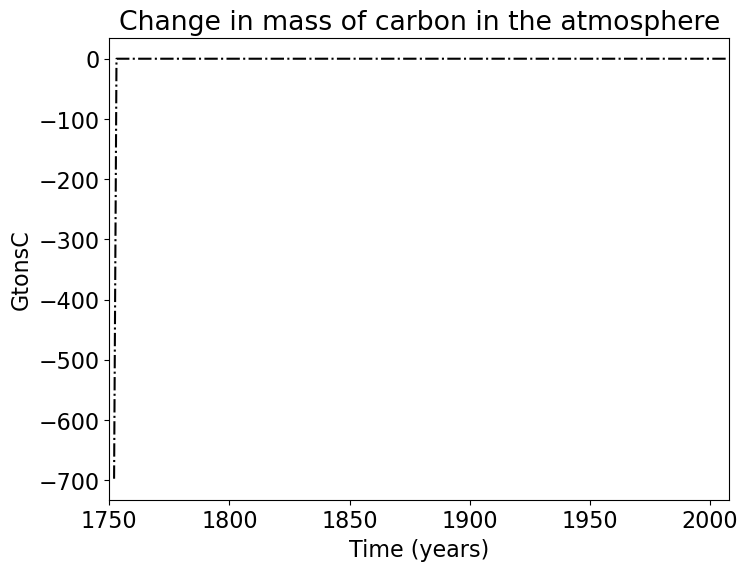

In [99]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
plt.title('Change in mass of carbon in the atmosphere')
plt.plot(year[1:],np.diff(MA2),'k-.')
plt.xlabel('Time (years)')
plt.ylabel('GtonsC')
plt.xlim([1750,2008])
plt.show()

__Problem C: Examining the effects of mitigation__

In [100]:
# Importing the data to the workspace
data = np.loadtxt("EmissionsMitigationScenarios.2008_2100.csv", delimiter = ",", skiprows=1);
year = data[:,0];
cflux_nz2030 = data[:,1];
cflux_nz2050 = data[:,2];
cflux_zeg = data[:,3];


___Running the simulations___

In [101]:
# initial values
N = year.size;
M10 = MA1[Nx-1];
M20 = MA2[Nx-1];

MS1 = np.zeros((3,N));
MS2 = np.zeros((3,N));

MS1[:,0] = M10;
MS2[:,0] = M20;
dt = 1;

In [102]:
# simulating using the forward we start with year 2009 because we already computed for 2008

for n in range(N-1):
    # net zero by 2030
    fn1 = k21*MS2[0,n] - k12*MS1[0,n]*MS2[0,n] + cflux_nz2030[n+1];
    fn2 = k12*MS1[0,n]*MS2[0,n] - k21*MS2[0,n];
    MS1[0,n+1] = MS1[0,n] + dt*fn1;
    MS2[0,n+1] = MS2[0,n] + dt*fn2;
    
    # net zero by 2030
    fn1 = k21*MS2[1,n] - k12*MS1[1,n]*MS2[1,n] + cflux_nz2050[n+1];
    fn2 = k12*MS1[1,n]*MS2[1,n] - k21*MS2[1,n];
    MS1[1,n+1] = MS1[1,n] + dt*fn1;
    MS2[1,n+1] = MS2[1,n] + dt*fn2;
    
    # Zero growth in emissions
    fn1 = k21*MS2[2,n] - k12*MS1[2,n]*MS2[2,n] + cflux_zeg[n+1];
    fn2 = k12*MS1[2,n]*MS2[2,n] - k21*MS2[2,n];
    MS1[2,n+1] = MS1[2,n] + dt*fn1;
    MS2[2,n+1] = MS2[2,n] + dt*fn2;

___Plotting mass of C in the atmosphere versus time___

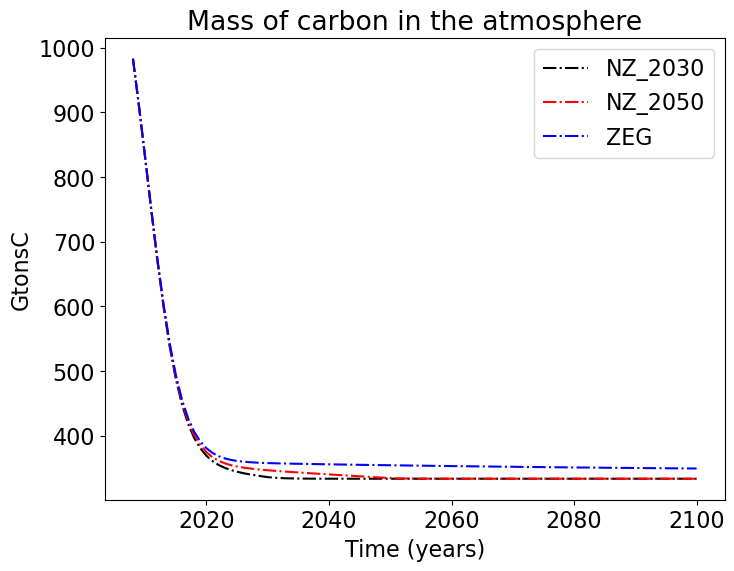

In [103]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
plt.title('Mass of carbon in the atmosphere')
plt.plot(year,MS1[0,:],'k-.',label="NZ_2030")
plt.plot(year,MS1[1,:],'r-.',label='NZ_2050')
plt.plot(year,MS1[2,:],'b-.',label='ZEG')
plt.xlabel('Time (years)')
plt.ylabel('GtonsC')
plt.legend()
plt.show()

___comment:___
We notice that for Net zero emission before 2030 (NZ_2030) and net zero emission before 2050 (NZ_2050) we are able to reach the amount of carbon that was in the atmosphere in the year 1750. With the NZ-2030 reaching the target sooner. For constant emission (ZEG) we do not reach that target, but amount of carbon in the atmosphere decreases within a few years as well.

___Plotting the mass of carbon in the biosphere___

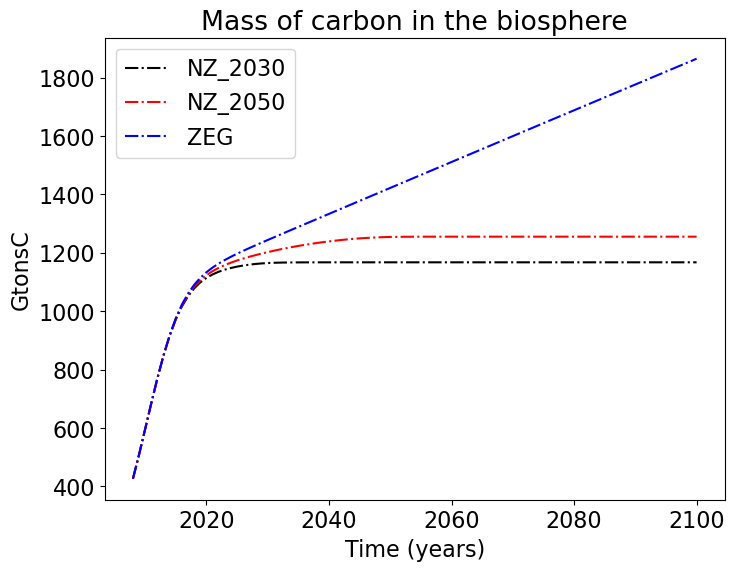

In [104]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
plt.title('Mass of carbon in the biosphere')
plt.plot(year,MS2[0,:],'k-.',label="NZ_2030")
plt.plot(year,MS2[1,:],'r-.',label='NZ_2050')
plt.plot(year,MS2[2,:],'b-.',label='ZEG')
plt.xlabel('Time (years)')
plt.ylabel('GtonsC')
plt.legend()
plt.show()

___comment:___
The amount of carbon approaches that we had in the year 1950 for the NZ-2030 and NZ_2050 case, while the ZEG the amount of carbon in the biosphere continues to rise.

___Plotting the change of Mass in the atmosphere___

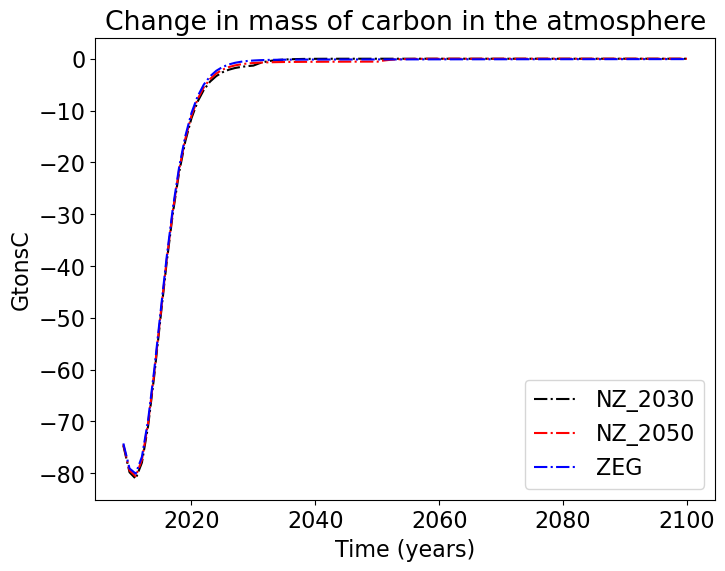

In [89]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
plt.title('Change in mass of carbon in the atmosphere')
plt.plot(year[1:],np.diff(MS1[0,:]),'k-.',label="NZ_2030")
plt.plot(year[1:],np.diff(MS1[1,:]),'r-.',label='NZ_2050')
plt.plot(year[1:],np.diff(MS1[2,:]),'b-.',label='ZEG')
plt.xlabel('Time (years)')
plt.ylabel('GtonsC')
plt.legend()
plt.show()

___Plotting the change in mass of carbon in the biosphere___

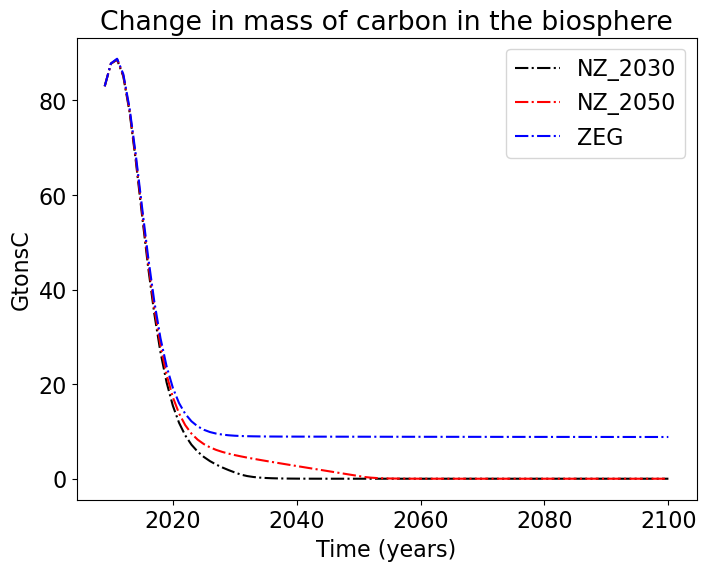

In [90]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
plt.title('Change in mass of carbon in the biosphere')
plt.plot(year[1:],np.diff(MS2[0,:]),'k-.',label="NZ_2030")
plt.plot(year[1:],np.diff(MS2[1,:]),'r-.',label='NZ_2050')
plt.plot(year[1:],np.diff(MS2[2,:]),'b-.',label='ZEG')
plt.xlabel('Time (years)')
plt.ylabel('GtonsC')
plt.legend()
plt.show()